In [4]:
import pandas as pd
import plotly.express as px
import datapane as dp

In [9]:
df = pd.read_csv('estonia-passenger-list.csv', index_col='PassengerId')
df

,Country,Firstname,Lastname,Sex,Age,Category,Survived
PassengerId,,,,,,,
1,Sweden,ARVID KALLE,AADLI,M,62,P,0
2,Estonia,LEA,AALISTE,F,22,C,0
3,Estonia,AIRI,AAVASTE,F,21,C,0
4,Sweden,JURI,AAVIK,M,53,C,0
5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
...,...,...,...,...,...,...,...
985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
987,Sweden,ENN,QUNAPUU,M,77,P,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 1 to 989
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    989 non-null    object
 1   Firstname  989 non-null    object
 2   Lastname   989 non-null    object
 3   Sex        989 non-null    object
 4   Age        989 non-null    int64 
 5   Category   989 non-null    object
 6   Survived   989 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 61.8+ KB


### 1. Visualize and analize passengers by countries

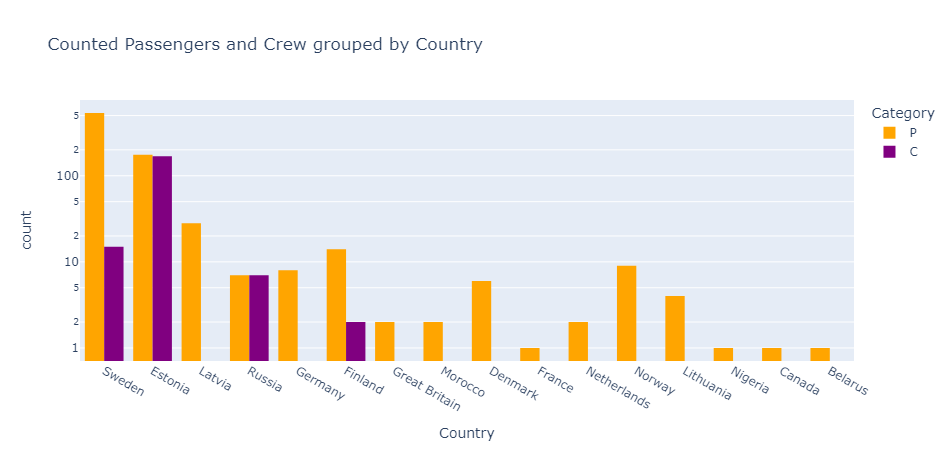

In [18]:
country_hist = px.histogram(df,
                            x='Country',
                            color='Category',
                            height=450,
                            barmode='group',
                            log_y=True,
                            color_discrete_sequence=['orange', 'purple'],
                            title='Counted Passengers and Crew grouped by Country'
                           )

country_hist

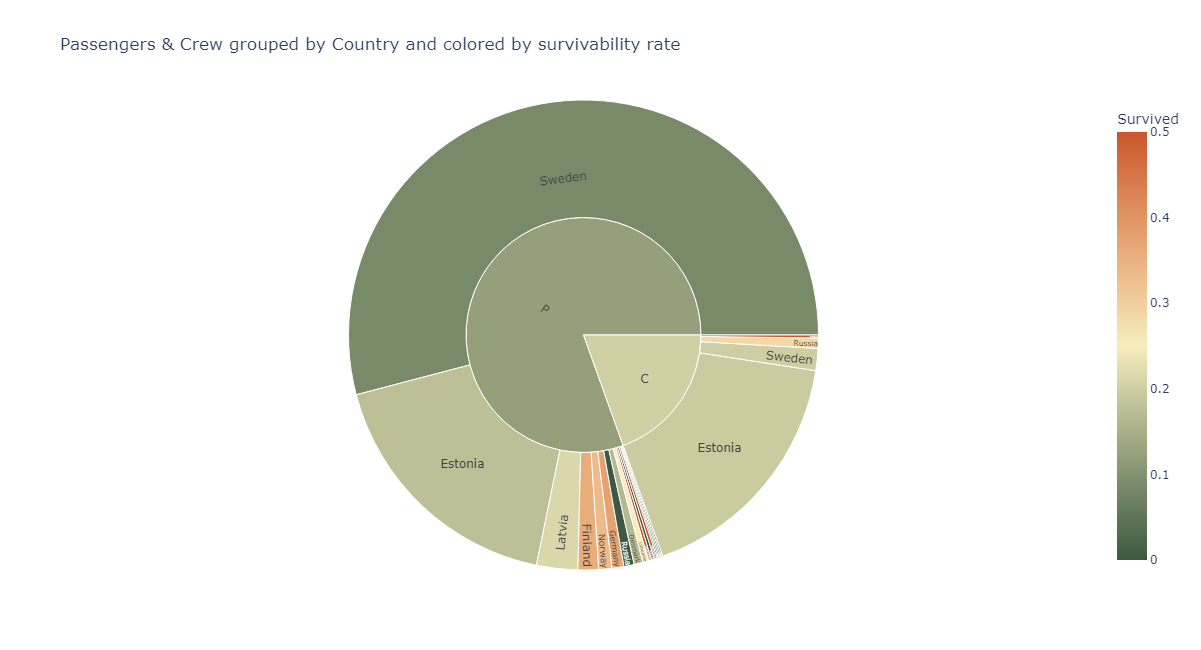

In [40]:
country_sunburst = px.sunburst(df,
                               path=['Category', 'Country'],
                               height=650,
                               color='Survived',
                               hover_name='Country',
                               color_continuous_scale=px.colors.diverging.Fall,
                               title='Passengers & Crew grouped by Country and colored by survivability rate'
                              )

country_sunburst

In [24]:
df_cat = df.groupby('Category')

In [28]:
country_vc = df_cat.Country.value_counts().to_frame()
country_vc.rename({'Country': 'Count'}, axis=1, inplace=True)

country_vc

Count
Category Country             
C        Estonia          169
         Sweden            15
         Russia             7
         Finland            2
P        Sweden           535
         Estonia          175
         Latvia            28
         Finland           14
         Norway             9
         Germany            8
         Russia             7
         Denmark            6
         Lithuania          4
         Great Britain      2
         Morocco            2
         Netherlands        2
         Belarus            1
         Canada             1
         France             1
         Nigeria            1

### 2. Visualize and analyze passengers by gender and age

In [34]:
df.head()

,Country,Firstname,Lastname,Sex,Age,Category,Survived
PassengerId,,,,,,,
1,Sweden,ARVID KALLE,AADLI,M,62,P,0
2,Estonia,LEA,AALISTE,F,22,C,0
3,Estonia,AIRI,AAVASTE,F,21,C,0
4,Sweden,JURI,AAVIK,M,53,C,0
5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


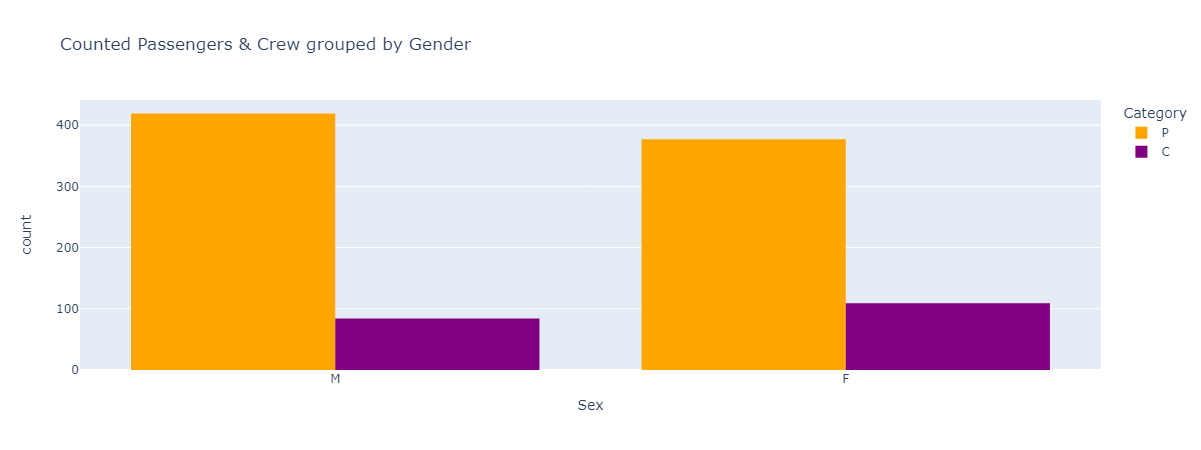

In [39]:
sex_hist = px.histogram(df,
                        x='Sex',
                        color='Category',
                        height=450,
                        barmode='group',
                        color_discrete_sequence=['orange', 'purple'],
                        title='Counted Passengers & Crew grouped by Gender'
                       )

sex_hist

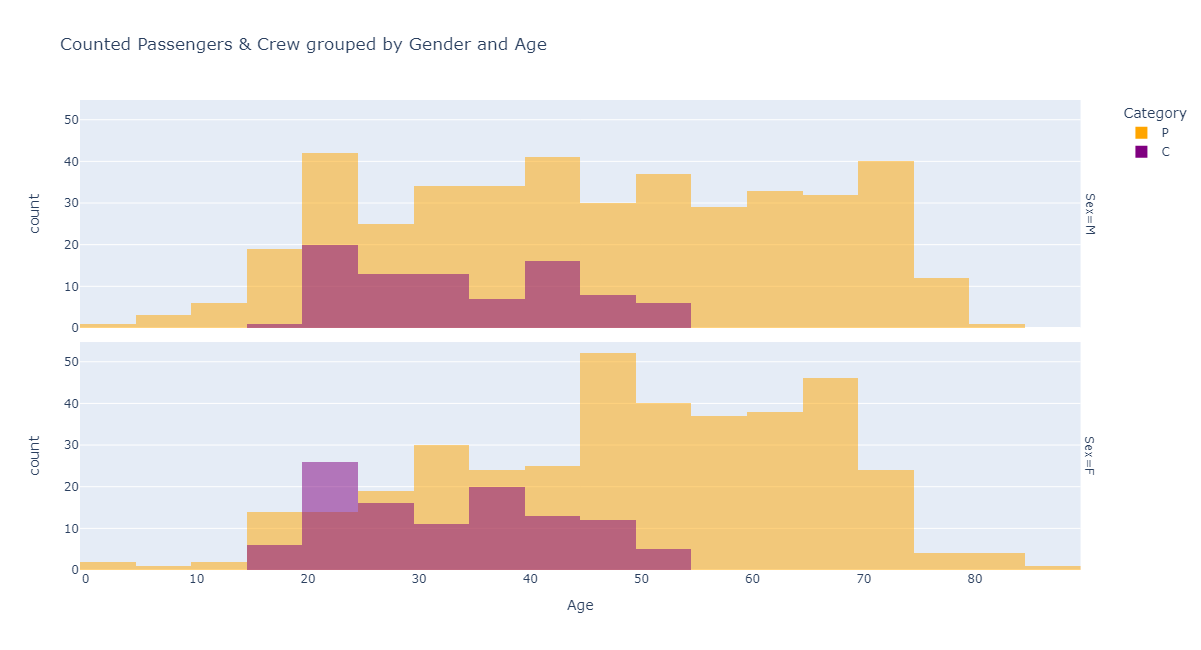

In [47]:
age_hist = px.histogram(df,
                        x='Age',
                        color='Category',
                        height=650,
                        barmode='overlay',
                        facet_row='Sex',
                        color_discrete_sequence=['orange', 'purple'],
                        title='Counted Passengers & Crew grouped by Gender and Age'
                       )

age_hist

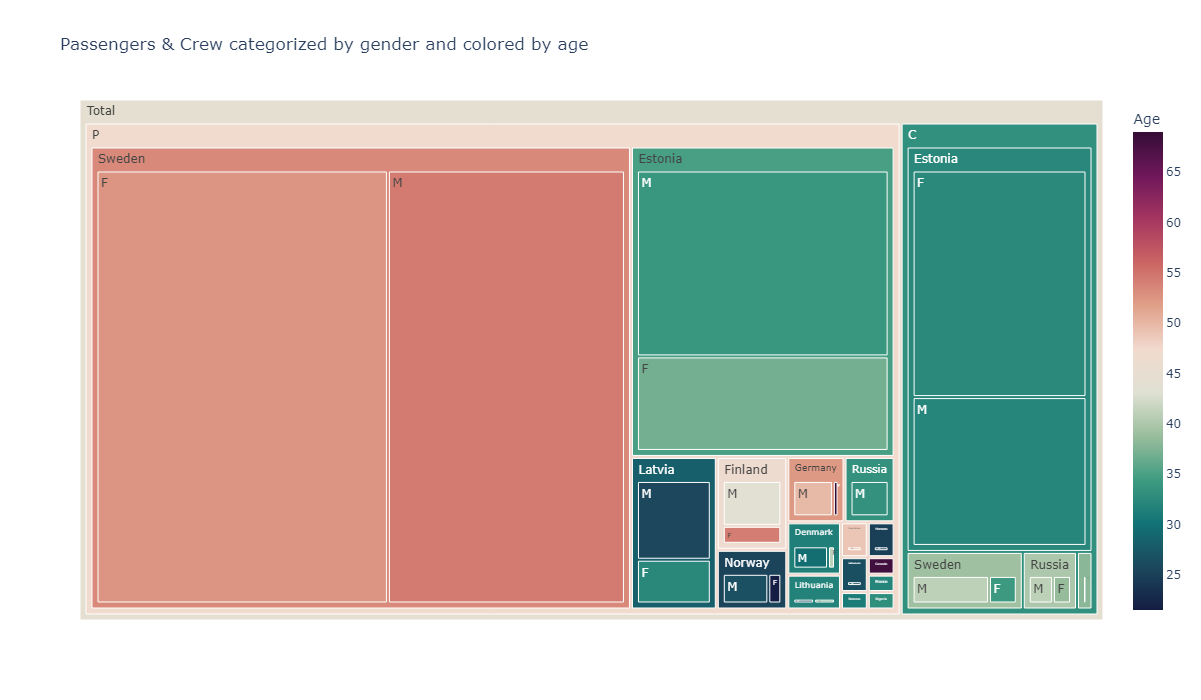

In [53]:
age_treemap = px.treemap(df,
                         height=700,
                         path=[px.Constant('Total'), 'Category', 'Country', 'Sex'],
                         color='Age',
                         hover_name = 'Country',
                         color_continuous_scale=px.colors.diverging.curl,
                         title='Passengers & Crew categorized by gender and colored by age'
                        )

age_treemap

In [55]:
gender_table = df_cat.Sex.value_counts().to_frame()
gender_table.rename({'Sex': 'Count'}, axis=1, inplace=True)
gender_table

Count
Category Sex       
C        F      109
         M       84
P        M      419
         F      377

### 3. Group age and make final plot

In [67]:
df.Age.describe()

count    989.000000
mean      44.575329
std       17.235146
min        0.000000
25%       30.000000
50%       44.000000
75%       59.000000
max       87.000000
Name: Age, dtype: float64

In [72]:
df['Age_group'] = pd.cut(df.Age, 6, precision=0, labels=['Child', 'Young', 'Adult', 'Mid-life', 'Senior', 'Elderly'])

In [73]:
df.head()

,Country,Firstname,Lastname,Sex,Age,Category,Survived,Age_group
PassengerId,,,,,,,,
1,Sweden,ARVID KALLE,AADLI,M,62,P,0,Senior
2,Estonia,LEA,AALISTE,F,22,C,0,Young
3,Estonia,AIRI,AAVASTE,F,21,C,0,Young
4,Sweden,JURI,AAVIK,M,53,C,0,Mid-life
5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0,Mid-life


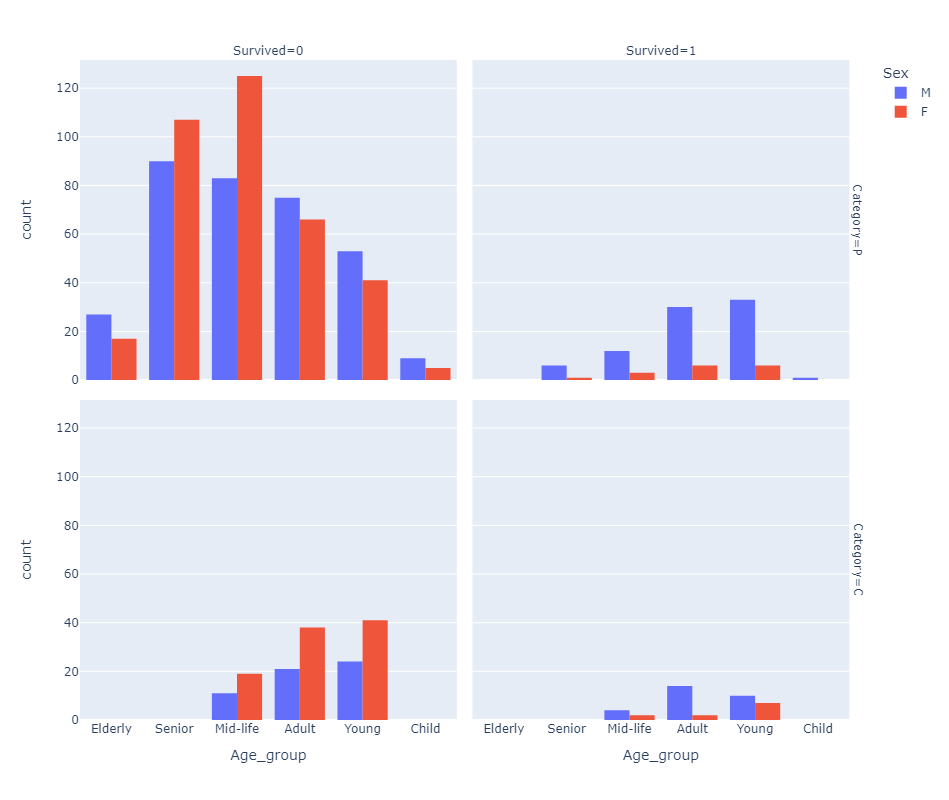

In [79]:
fnl_plot = px.histogram(df,
                        x='Age_group',
                        facet_row='Category',
                        facet_col='Survived',
                        height=800,
                        color='Sex',
                        barmode='group',
                        category_orders={'Age_group': list(reversed(['Child', 'Young', 'Adult', 'Mid-life', 'Senior', 'Elderly']))}
                       )

fnl_plot

In [82]:
country_counted = df.Country.value_counts()
drop_country_list = country_counted[country_counted < 4].index

clear_df = df[~df.Country.isin(drop_country_list)]

In [98]:
country_counted

Sweden           550
Estonia          344
Latvia            28
Finland           16
Russia            14
Norway             9
Germany            8
Denmark            6
Lithuania          4
Great Britain      2
Morocco            2
Netherlands        2
France             1
Nigeria            1
Canada             1
Belarus            1
Name: Country, dtype: int64

In [83]:
clear_df.Country.unique()

array(['Sweden', 'Estonia', 'Latvia', 'Russia', 'Germany', 'Finland',
       'Denmark', 'Norway', 'Lithuania'], dtype=object)

In [84]:
df_country = clear_df.groupby('Country')

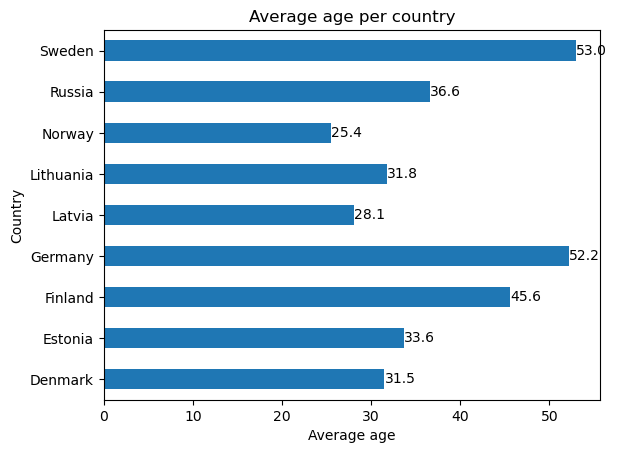

In [88]:
age_barchart = df_country['Age'].mean().plot(kind='barh',
                                             xlabel='Average age',
                                             title='Average age per country'
                                            )

for bar in age_barchart.containers:
    age_barchart.bar_label(bar, fmt='%.1f')

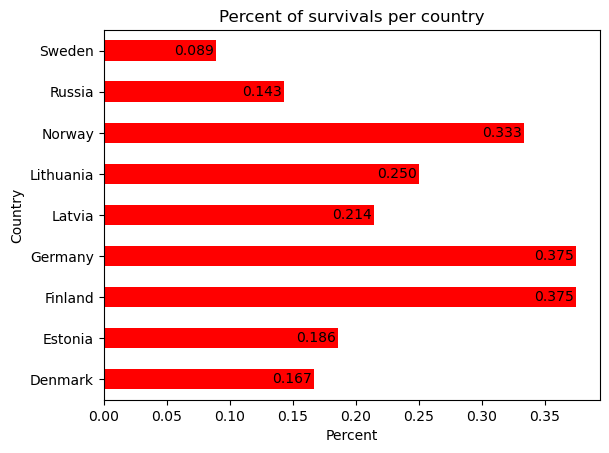

In [94]:
survive_barchart = df_country['Survived'].mean().plot(kind='barh',
                                                      xlabel='Percent',
                                                      title='Percent of survivals per country',
                                                      color='red'
                                                     )

for bar in survive_barchart.containers:
    survive_barchart.bar_label(bar, fmt='%.3f', padding=-30)

### 4. Visualize conclusions

### 5. Datapane report

In [29]:
history = '''MS Estonia was a cruiseferry built in 1979/80 at the German shipyard Meyer Werft in Papenburg. The ship's 1994 sinking, in the Baltic Sea between Sweden, Åland, Finland and Estonia, was one of the worst maritime disasters of the 20th century. It is the second-deadliest peacetime sinking of a European ship, after the RMS Titanic, and the deadliest peacetime shipwreck to have occurred in European waters, with 852 lives lost. At 6.30pm on 27 September 1994, the ferry MS Estonia – the largest ship then flying the flag of the young Baltic republic, and a symbol of recently regained independence – set sail from Tallinn on a routine overnight crossing to Stockholm. On board were 803 passengers, most of them Swedish, and 186 crew, most of them Estonian. The conditions were rough – force 8 winds and waves up to 6 metres – but not unusual for the Baltic Sea in autumn. All other scheduled ferries were at sea.'''

country_conc = '''Here we can see that most of passengers were from baltic and scandinavian countries and most of crew were from Estonia, Sweden, Russia and Finland. On the sunburst chart the colorbar represents percent of survivors for every country.'''

age_conc = '''There were just about equal males and females on board. Also we can see that average age of passengers was much higher then average age of crew. The country with significant number of passengers and highest mean age is Sweden.'''

final_conc = '''On the plot above we can compare the number of survivals dependent on their category (passenger/crew), age group and gender. Most survived passengers as well as crew were men 19-45 years old. In opposite, almost nobody survived in age group more then 60 y.o. To descry a correlation between age and chance of survive we can plot two bar charts: everage age per country and percent of survivals per country. Countries with less then 4 persons on board are not taken into account as non-significant.'''

country_compare = '''We can approve that the higher average age was - the less representatives of a country survived but here we have some exceptions like Germany, Finland and Estonia.''' 

In [96]:
report = dp.App(
    dp.Page(
        dp.Text('# MS Estonia History'),
        dp.Group(
            dp.Text(history),
            dp.Media('MS_Estonia.jpeg', caption='Sinking of MS Estonia'),
            columns=2
        ),
        dp.DataTable(df),
        title='History'
    ),
    dp.Page(
        dp.Text('# Analysis of passengers and crew by country'),
        dp.Plot(country_hist),
        dp.Plot(country_sunburst),
        dp.Toggle(
            blocks=[
                dp.Group(
                    dp.Text(country_conc),
                    dp.Table(country_vc),
                    valign='center',
                    columns=2
                )
            ],
            label='Conclusion'
        ),
        title='Country'
    ),
    dp.Page(
        dp.Text('# Analysis of passengers and crew by sex & age'),
        dp.Plot(sex_hist),
        dp.Plot(age_hist),
        dp.Plot(age_treemap),
        dp.Toggle(
            blocks=[
                dp.Group(
                    dp.Text(age_conc),
                    dp.Table(gender_table),
                    valign='center',
                    columns=2
                )
            ],
            label='Conclusion'
        ),
        title='Sex & Age'
    ),
    dp.Page(
        dp.Text('# Analysis the dependencies of survive'),
        dp.Plot(fnl_plot),
        dp.Text(final_conc),
        dp.Group(
            dp.Plot(age_barchart),
            dp.Plot(survive_barchart),
            columns=2
        ),
        dp.Text(country_compare),
        title='Final comparison'
    )
)

In [97]:
report.save('report.html')

C:\Users\USER\anaconda3\Lib\site-packages\datapane\common\df_processor.py:26: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\USER\anaconda3\Lib\site-packages\datapane\common\df_processor.py:104: FutureWarning:

Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.



App saved to ./report.html